<a href="https://colab.research.google.com/github/varnit836/Airbnb-NYC-2019/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

#Import libraries

In [ ]:
#importing necessery libraries for future analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

#Loading data

In [ ]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [ ]:
#read csv file
file_path = '/content/gdrive/MyDrive/AlmaBetter/CSV_file/Airbnb_NYC_2019.csv'
airbnb= pd.read_csv(file_path)

In [ ]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#checking the dataset
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#Cleaning our data 

In [ ]:
#dropping columns that are not significant for our data exploration
airbnb.drop(['id','last_review'], axis=1, inplace=True)

In [ ]:
#looking to find out first what columns have null values
airbnb.isnull().sum()

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

##Observation



*  There are total 3 columns with null values
*  name has 16 null values
*  neighbourhood_group has 21 null values
*  reviews_per_month have many null values around 10052.

##Replacing all the nan values in the reviews_per_month column with 0 since reviews can be 0

In [ ]:
airbnb.fillna({'reviews_per_month':0},inplace=True)

In [ ]:
#Let's check the column
airbnb.reviews_per_month.isna().sum()

0

#Let us find out that the range of cost for different room_type




In [ ]:
#examining the unique values of room_type 
airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

Text(0.5, 1.0, 'Room Type vs Price')

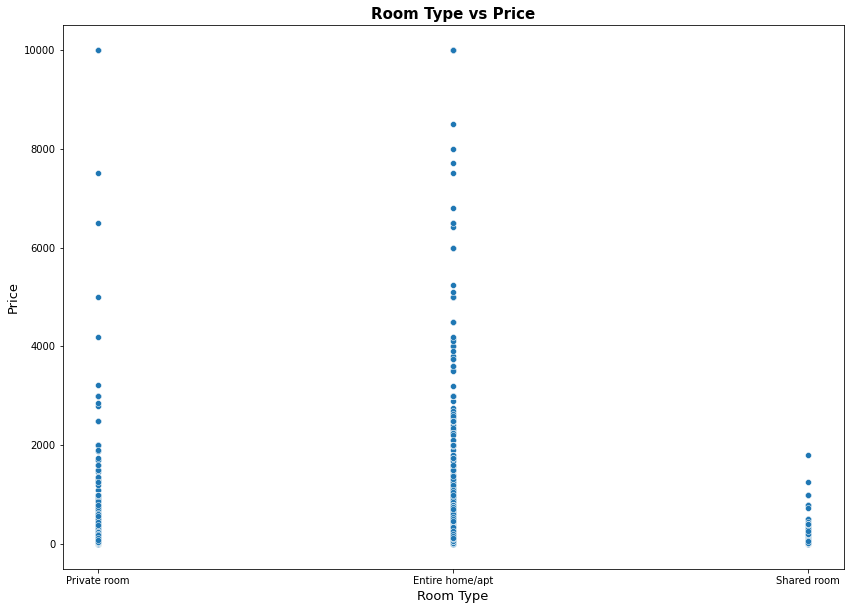

In [ ]:
#plotting graph
plt.figure(figsize=(14,10))
sns.scatterplot(x='room_type', y='price', data=airbnb)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price",size=15, weight='bold')

##Observation -

*   Most expensive room are of Private room and Entire home/apt with price 1000.
*   Entire home/apt have various typ of range in price.
*   Shared room have least variety in price.






#Let us find the top 15 unique host with their count value

In [ ]:
#top 15 unique host with their count value
top_host=airbnb.host_id.value_counts().head(15)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
1475015       52
120762452     50
2856748       49
205031545     49
190921808     47
Name: host_id, dtype: int64

In [ ]:
#creating a dataframe of top 15 hostid with their count in original dataset
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'host_id', 'host_id':'count'}, inplace=True)
top_host_df

,host_id,count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


Text(0.5, 0, 'Host Id')

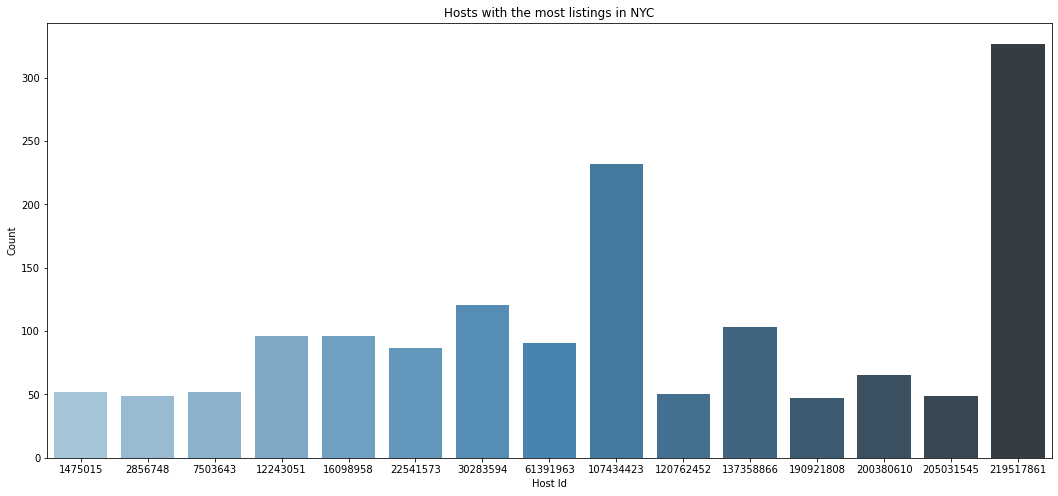

In [ ]:
#plotting top_host_df
plt.figure(figsize=(18,8))
plot_1=sns.barplot(x="host_id", y="count", data=top_host_df,
                 palette='Blues_d')
plot_1.set_title('Hosts with the most listings in NYC')
plot_1.set_ylabel('Count')
plot_1.set_xlabel('Host Id')

##Observation 



*   Host with host_id 219517861 have maximum number of count.
*   Host with host_id 190921808 have minimum number of count. 


#Let us plot the graph of top 15 host (in term of counts) vs their room_typ 

In [ ]:
#we can get the list of top 15 host_id by this
list(top_host_df['host_id'])

[219517861,
 107434423,
 30283594,
 137358866,
 16098958,
 12243051,
 61391963,
 22541573,
 200380610,
 7503643,
 1475015,
 120762452,
 2856748,
 205031545,
 190921808]

In [ ]:
# creating a sub_dataframe with only rows which have top 15 host id 
sub_1 = airbnb.loc[airbnb['host_id'].isin(list(top_host_df['host_id']))]
sub_1

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1386,"2 BED TriBeCa, Beautiful-Renovated!",1475015,Mike,Manhattan,Tribeca,40.71655,-74.01171,Entire home/apt,130,30,2,0.03,52,116
1454,ELEGANT MIDTOWN EAST STUDIO E.52 ST,1475015,Mike,Manhattan,Midtown,40.75743,-73.96939,Entire home/apt,90,30,3,0.05,52,358
1455,32nd St & Lexington Ave / Doorman Beautiful St...,1475015,Mike,Manhattan,Kips Bay,40.74190,-73.98160,Entire home/apt,100,30,2,0.04,52,342
1456,COLUMBUS CIRCLE~FULLY FURNISHED!!!,1475015,Mike,Manhattan,Hell's Kitchen,40.76758,-73.98722,Entire home/apt,85,30,2,0.04,52,223
1457,GRAMERCY PARK~FURNISHED E.20's ST P,1475015,Mike,Manhattan,Kips Bay,40.74189,-73.97833,Entire home/apt,87,30,3,0.05,52,363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48723,Smart Nolita 1BR w/ W/D near famous cafes by B...,107434423,Blueground,Manhattan,Nolita,40.72283,-73.99472,Entire home/apt,316,30,0,0.00,232,325
48724,Dapper Hell's Kitchen 2BR w/ Gym + W/D + Door...,107434423,Blueground,Manhattan,Hell's Kitchen,40.76082,-73.99709,Entire home/apt,385,30,0,0.00,232,338
48725,Trendy Hell's Kitchen 1BR w/ Gym + W/D + Doorm...,107434423,Blueground,Manhattan,Hell's Kitchen,40.76083,-73.99727,Entire home/apt,267,30,0,0.00,232,228
48726,Beautiful Williamsburg 2BR w/ Skyline views + ...,107434423,Blueground,Brooklyn,Williamsburg,40.71493,-73.96365,Entire home/apt,278,30,0,0.00,232,188


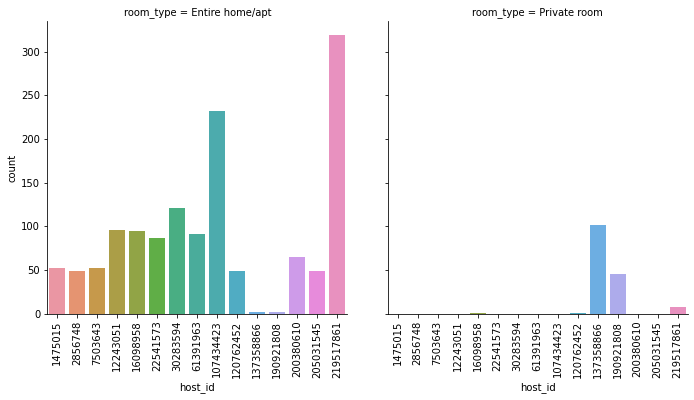

In [ ]:
#using catplot to represent the count of host_id by their room_typ
plot_2=sns.catplot(x='host_id', col='room_type', data=sub_1, kind='count')
plot_2.set_xticklabels(rotation=90)

##Observation



*  Top 15 Host are dealing with Entire home/apt.
*  Most of the Host among top 15 are dealing with Private room.
*  No Host among top 15 is dealing with Shared room.






#Most reviewed hosts

In [ ]:
most_reviewed_hosts =airbnb.groupby('host_name')['reviews_per_month'].max().sort_values(ascending=False)[:10].reset_index(name='max_reviews_per_month')
most_reviewed_hosts

,host_name,max_reviews_per_month
0,Row NYC,58.50
1,Louann,20.94
2,Nalicia,19.75
3,Danielle,16.22
4,Brent,15.78
5,Lakshmee,15.32
6,Dona,14.58
7,Sam,14.00
8,Alina,14.00
9,Yvonne,13.48


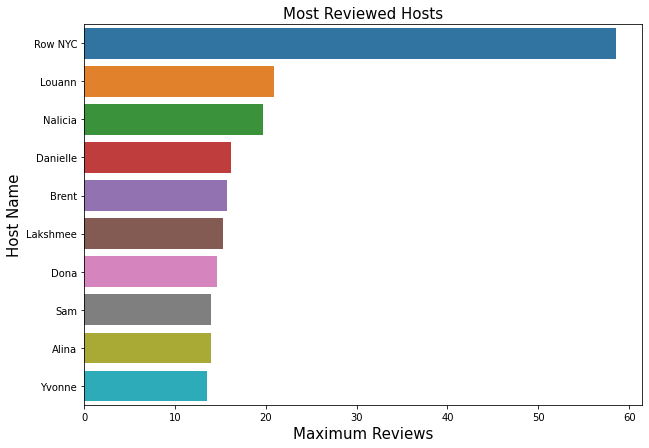

In [ ]:
#plotting graph
plt.figure(figsize = (10,7))
hosts_reviewed_df= sns.barplot(x='max_reviews_per_month',y='host_name',data= most_reviewed_hosts)
hosts_reviewed_df.set_title('Most Reviewed Hosts',fontsize=15,color='Black')
hosts_reviewed_df.set_ylabel('Host Name',fontsize=15,color='Black')
hosts_reviewed_df.set_xlabel('Maximum Reviews',fontsize=15,color='Black')
plt.show()

##Observation

*   Row NYC is the most reviewed host with more than 50 reveiws per month
*  Louann, Nalicia, Daniella, Brent are others that had the most reviews in the top 5

#Room types and their availability

In [ ]:
#Let us check the room types availability
room_availability = airbnb.groupby('room_type')['availability_365'].mean().sort_values(ascending=False)
room_availability.reset_index()

,room_type,availability_365
0,Shared room,162.000862
1,Entire home/apt,111.920304
2,Private room,111.203933


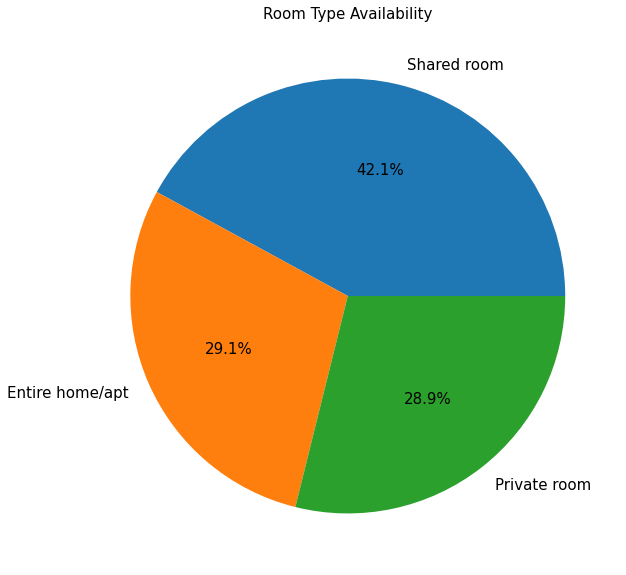

In [ ]:
#Plotting our data using a pie chart
room_availability.plot(kind='pie',autopct='%1.1f%%',fontsize=15)
plt.title('Room Type Availability',fontsize=15,color='black')
plt.ylabel('')
plt.rcParams['figure.figsize'] = (14, 12)

##Observation

*   Shared rooms have a availability of about 42% which makes it the most available room type throughout the year
*   Both Entire home/apartment and private rooms have almost similar availability with 29.1% and 28.9% respectively

#Neighbourhood groups and their availability 

In [ ]:
availability_neighbour_df =airbnb.groupby(['neighbourhood_group'])['availability_365'].mean()
availability_neighbour_df.reset_index()

,neighbourhood_group,availability_365
0,Bronx,165.758937
1,Brooklyn,100.232292
2,Manhattan,111.979410
3,Queens,144.451818
4,Staten Island,199.678284


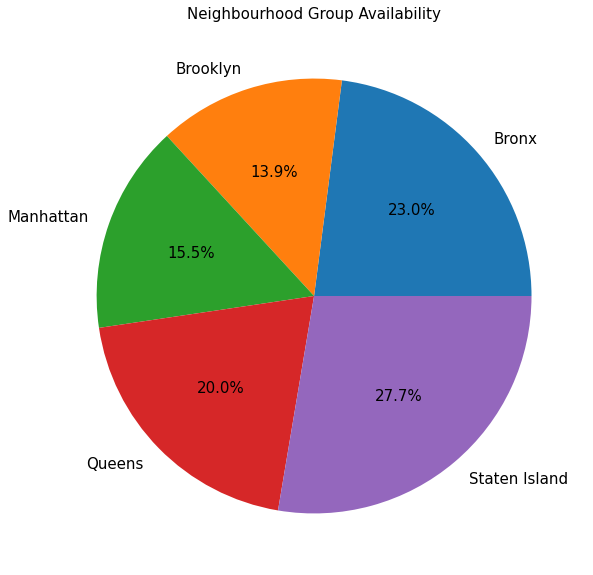

In [ ]:
#Plotting our data using pie chart
availability_neighbour_df.plot(kind='pie',autopct='%1.1f%%',fontsize=15)
plt.title('Neighbourhood Group Availability',fontsize=15,color='black')
plt.ylabel('')
plt.rcParams['figure.figsize'] = (14, 12)

##Observation



*   Staten Island is the most available group among all with 27.7% availablity.
*   Brooklyn is least available group with approx 14%.
*   Manhattan, Bronx and Queens are available with 15.5%, 23% and 20% respectively.






#Correlation of price with other independent variables

In [ ]:
#Let us take all the columns with numeric data
numeric_df=airbnb[['id', 'host_id', 'latitude', 'longitude', 'price',
       'minimum_nights', 'number_of_reviews','reviews_per_month', 'calculated_host_listings_count',
       'availability_365']]

In [ ]:
#correlation
correlation_df=numeric_df.corr()
correlation_df

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


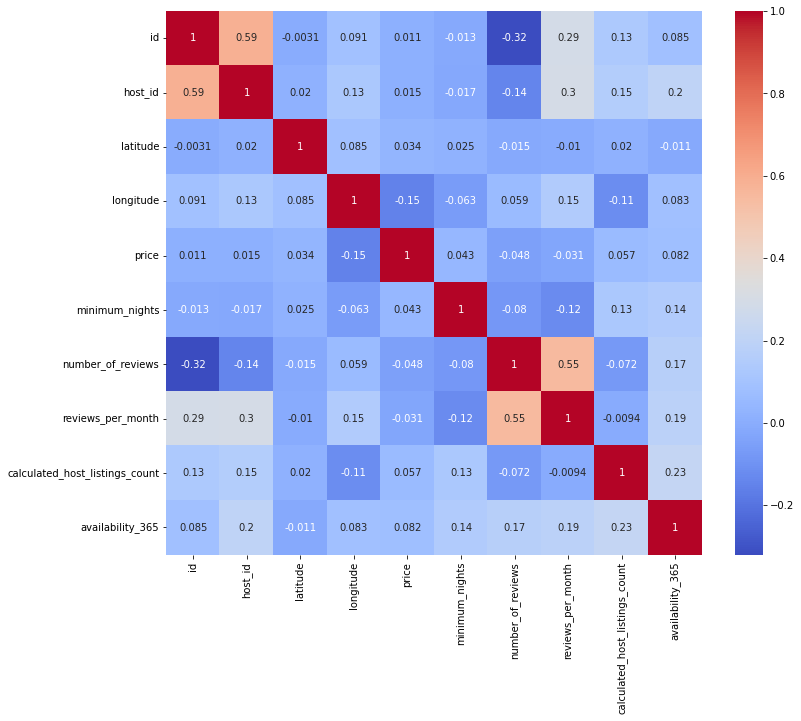

In [ ]:
#plotting our data using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_df,cmap='coolwarm', annot=True)

##Observation


*   Clearly, we can see that price does not have a strong relationship with any independent variables. Also, there no relationship among independant variables. Thus we can streamline our analysis towards categorical data with independent variables